 Load and Explore Data

   Exercise_Time_Min  Healthy_Meals_Per_Day  Sleep_Hours_Per_Night  \
0          34.967142                      5               7.618856   
1          28.617357                      8               4.105473   
2          36.476885                      4               6.024123   
3          45.230299                      1               8.565319   
4          27.658466                      3               8.301648   

   Stress_Level        BMI  
0             2  33.068556  
1             7  27.267672  
2             1  23.779217  
3             8  29.820436  
4             3  30.947352  
Shape of dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exercise_Time_Min      200 non-null    float64
 1   Healthy_Meals_Per_Day  200 non-null    int64  
 2   Sleep_Hours_Per_Night  200 non-null    float64
 3   Stress_Le

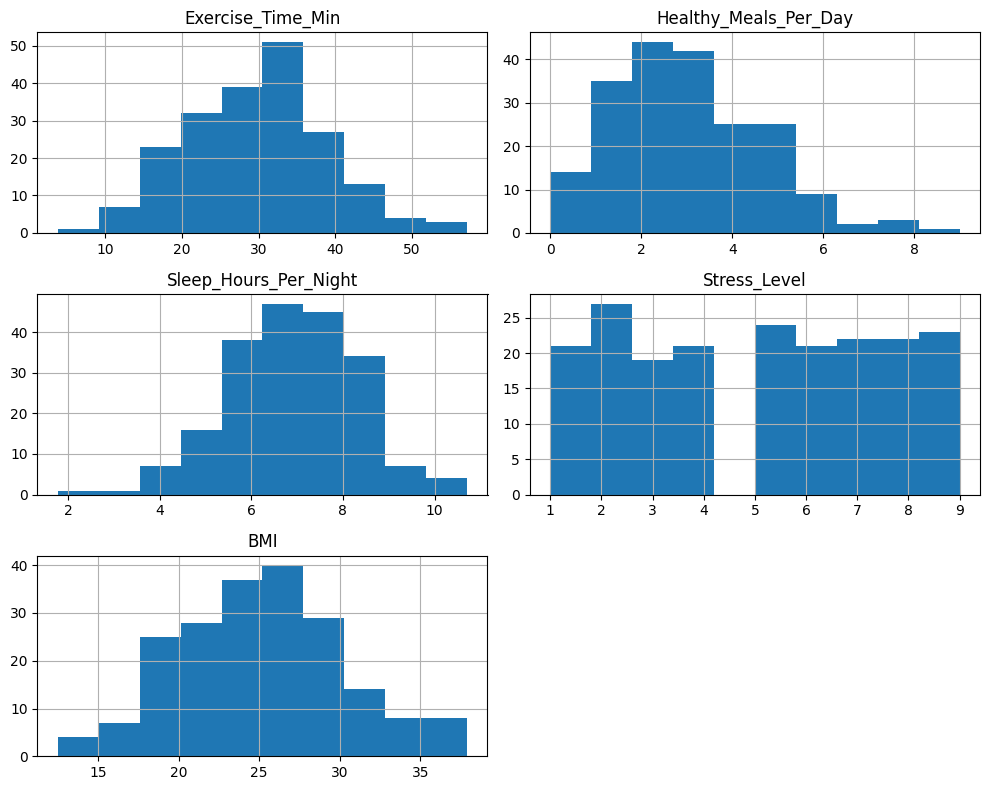

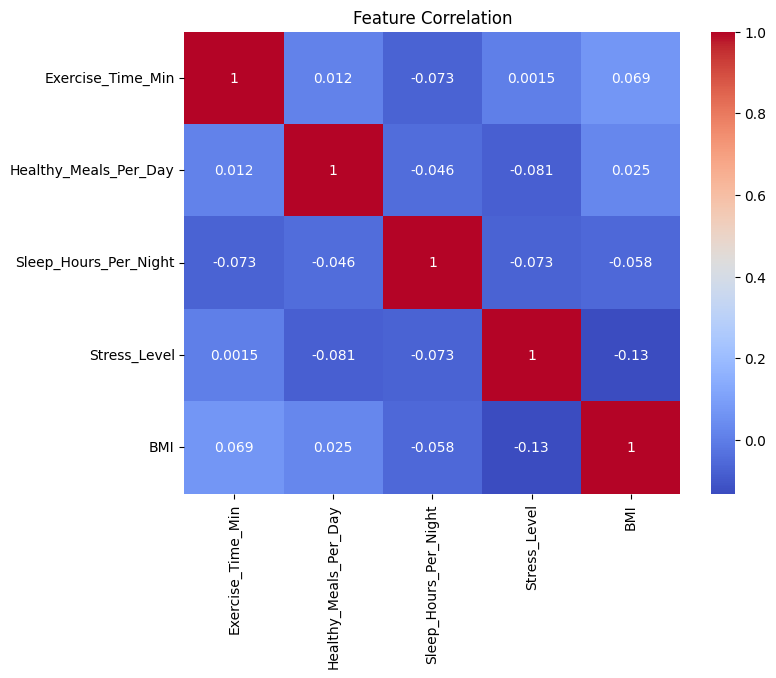

In [63]:
# Step 1: Load and Explore Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/simulated_health_wellness_data.csv')
print(df.head())  # Preview
print("Shape of dataset:", df.shape)
print(df.info())  # Structure and types
print(df.describe())  # Basic statistics
print(df.isnull().sum())  # Missing values

# Visualize distributions and correlations
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()


KMeans Clustering and Elbow Method

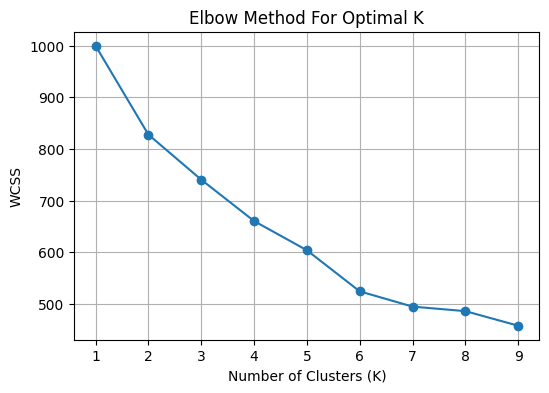

In [64]:
# Step 2: Clustering Using KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Elbow Method to choose K
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Apply KMeans with K=3 and Visualize

Silhouette Score (KMeans, k=3): 0.152


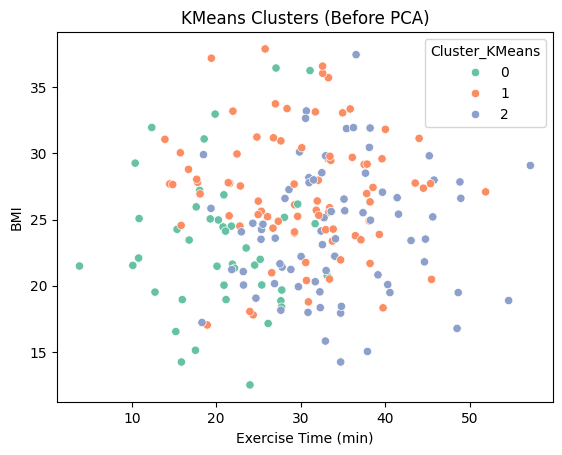

In [65]:
# Step 3: Apply KMeans for K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster_KMeans'] = clusters

score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score (KMeans, k=3): {score:.3f}")

sns.scatterplot(x=df['Exercise_Time_Min'], y=df['BMI'],
                hue=df['Cluster_KMeans'], palette='Set2')
plt.title("KMeans Clusters (Before PCA)")
plt.xlabel("Exercise Time (min)")
plt.ylabel("BMI")
plt.show()


Analyze Cluster Groups

In [66]:
# Step 4: Analyze Cluster Behavior
cluster_summary = df.groupby('Cluster_KMeans').mean()
print(cluster_summary)


                Exercise_Time_Min  Healthy_Meals_Per_Day  \
Cluster_KMeans                                             
0                       20.882706               1.704545   
1                       30.153795               3.414634   
2                       34.148754               2.972973   

                Sleep_Hours_Per_Night  Stress_Level        BMI  
Cluster_KMeans                                                  
0                            6.169744      5.136364  23.233885  
1                            7.385093      2.670732  27.124795  
2                            6.887434      7.486486  24.101048  


 Add Cluster Labels and Summarize

In [67]:
# Step 5: Add Unique Cluster Labels
cluster_labels = {
    0: '⚠️ At-Risk Group',
    1: '🌿 Balanced Lifestyle',
    2: '🔥 Stressed but Active'
}
df['Cluster_Label'] = df['Cluster_KMeans'].map(cluster_labels)

# Summary by label
summary_table = df.groupby('Cluster_Label').mean(numeric_only=True).round(2)
print("📊 Cluster Summary Table:\n")
print(summary_table)


📊 Cluster Summary Table:

                       Exercise_Time_Min  Healthy_Meals_Per_Day  \
Cluster_Label                                                     
⚠️ At-Risk Group                   20.88                   1.70   
🌿 Balanced Lifestyle               30.15                   3.41   
🔥 Stressed but Active              34.15                   2.97   

                       Sleep_Hours_Per_Night  Stress_Level    BMI  \
Cluster_Label                                                       
⚠️ At-Risk Group                        6.17          5.14  23.23   
🌿 Balanced Lifestyle                    7.39          2.67  27.12   
🔥 Stressed but Active                   6.89          7.49  24.10   

                       Cluster_KMeans  
Cluster_Label                          
⚠️ At-Risk Group                  0.0  
🌿 Balanced Lifestyle              1.0  
🔥 Stressed but Active             2.0  


Visualize Cluster Summary

/tmp/ipython-input-68-4241599104.py:9: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-68-4241599104.py:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


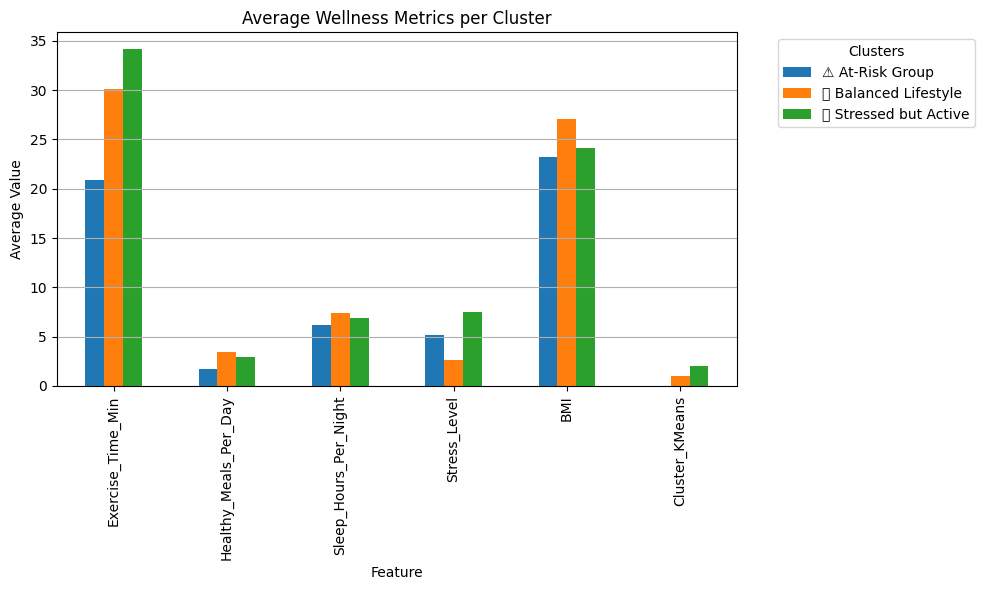

In [68]:
# Step 6: Visualize Summary Table
summary_plot = summary_table.T
summary_plot.plot(kind='bar', figsize=(10, 6))
plt.title("Average Wellness Metrics per Cluster")
plt.ylabel("Average Value")
plt.xlabel("Feature")
plt.grid(axis='y')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Silhouette Score Comparison (K=3 vs K=4)

In [69]:
# Step 7: Compare K=3 vs K=4
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(scaled_data)
score_k3 = silhouette_score(scaled_data, clusters_3)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(scaled_data)
score_k4 = silhouette_score(scaled_data, clusters_4)

print(f"Silhouette Score (K=3): {score_k3:.3f}")
print(f"Silhouette Score (K=4): {score_k4:.3f}")


Silhouette Score (K=3): 0.152
Silhouette Score (K=4): 0.158


PCA and KMeans on PCA Data

In [70]:
# Step 8: PCA and Clustering on PCA Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)
score_pca = silhouette_score(pca_data, clusters_pca)

print(f"Silhouette Score (K=3) Before PCA: {score_k3:.3f}")
print(f"Silhouette Score (K=3) After PCA:  {score_pca:.3f}")


Silhouette Score (K=3) Before PCA: 0.152
Silhouette Score (K=3) After PCA:  0.363


Compare All Scores with Bar Chart

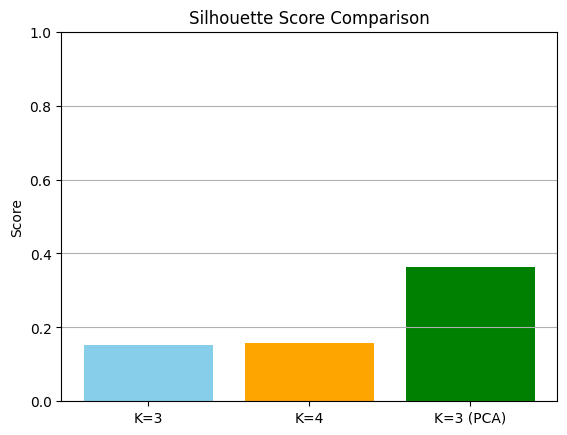

In [71]:
# Step 9: Compare Scores with Bar Chart
scores = [score_k3, score_k4, score_pca]
labels = ['K=3', 'K=4', 'K=3 (PCA)']

plt.bar(labels, scores, color=['skyblue', 'orange', 'green'])
plt.title('Silhouette Score Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Visualize PCA Clusters (Figure 6)

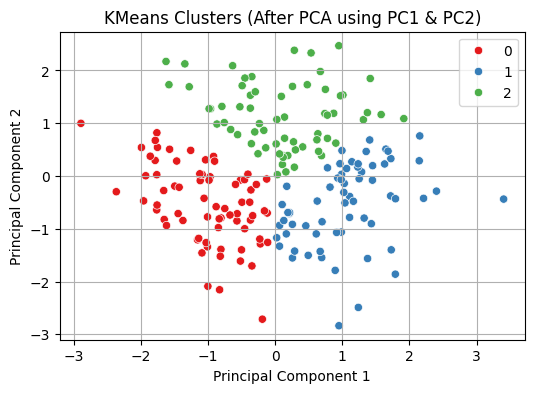

In [11]:
#Step 10: Visualize PCA Clusters (Figure 6)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("/content/simulated_health_wellness_data.csv")

# Step 2: Standardize numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include='number'))

# Step 3: Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Step 4: Apply KMeans clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

# Step 5: Plot the PCA-based cluster scatterplot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters_pca, palette='Set1')
plt.title("KMeans Clusters (After PCA using PC1 & PC2)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.savefig("/content/figure6_pca_clusters.png")  # Save the figure
plt.show()
